# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [26]:
response_json = []
name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
windspeed = []


# {'base': 'stations',
#  'clouds': {'all': 90},
#  'cod': 200,
#  'coord': {'lat': 49.23, 'lon': -102.17},
#  'dt': 1584294975,
#  'id': 6095751,
#  'main': {'feels_like': -14.02,
#           'humidity': 85,
#           'pressure': 1028,
#           'temp': -7.43,
#           'temp_max': -7,
#           'temp_min': -7.78},
#  'name': 'Oxbow',
#  'sys': {'country': 'CA',
#          'id': 790,
#          'sunrise': 1584277256,
#          'sunset': 1584320041,
#          'type': 1},
#  'timezone': -21600,
#  'visibility': 14484,
#  'weather': [{'description': 'light snow',
#               'icon': '13d',
#               'id': 600,
#               'main': 'Snow'}],
#  'wind': {'deg': 110, 'speed': 5.1}}

# Make a request for each of the indices
for x in range(len(cities)):
    print(f"Processing Record: {x} of Set 1| {cities[x]}")

    # Get one of the posts
    response = requests.get(query_url + str(cities[x]))

    response_json.append(response.json())
    
    try:
     name_pull = response_json[x]['name']  
     cloudiness_pull = response_json[x]['clouds']['all']
     country_pull = response_json[x]['sys']['country']
     date_pull = response_json[x]['dt']
     humidity_pull = response_json[x]['main']['humidity']
     lat_pull = response_json[x]['coord']['lat']
     long_pull = response_json[x]['coord']['lon']
     maxtemp_pull = response_json[x]['main']['temp_max']
     wind_pull = response_json[x]['wind']['speed']

     name.append(name_pull)
     cloudiness.append(cloudiness_pull)
     country.append(country_pull)
     date.append(date_pull)
     humidity.append(humidity_pull)
     lat.append(lat_pull)
     long.append(long_pull)
     max_temp.append(maxtemp_pull) 
     windspeed.append(wind_pull)
    except:
     print("Datanot found")
    pass

#     cloudiness.append(response['clouds']['all'])
#     country.append(response['sys']['country'])
#     date.append(response['dt'])
#     humidity.append(response['main']['humidity'])
#     lat.append(response['coord']['lat'])
#     long.append(response['coord']['lon'])
#     temp.append(response['main']['temp_max']) 
#     windspeed.append(response['wind']['speed'])
    
    # Save post's JSON

    
#       # Get weather data
#     weather_response = requests.get(query_url)
#     weather_json = weather_response.json()

#     # Get temperature from JSON response
#     temperature = weather_json["main"]["temp"]

#     temperatures.append(temperature)
      



Processing Record: 0 of Set 1| klaksvik
Processing Record: 1 of Set 1| punta arenas
Processing Record: 2 of Set 1| ushuaia
Processing Record: 3 of Set 1| rikitea
Processing Record: 4 of Set 1| busselton
Processing Record: 5 of Set 1| qandahar
Datanot found
Processing Record: 6 of Set 1| mataura
Processing Record: 7 of Set 1| victoria
Processing Record: 8 of Set 1| tautira
Processing Record: 9 of Set 1| atuona
Processing Record: 10 of Set 1| lebu
Processing Record: 11 of Set 1| butaritari
Processing Record: 12 of Set 1| haines junction
Processing Record: 13 of Set 1| jamestown
Processing Record: 14 of Set 1| ponta do sol
Processing Record: 15 of Set 1| la libertad
Processing Record: 16 of Set 1| cape town
Processing Record: 17 of Set 1| avarua
Processing Record: 18 of Set 1| salinopolis
Processing Record: 19 of Set 1| barrow
Processing Record: 20 of Set 1| biltine
Processing Record: 21 of Set 1| puerto ayora
Processing Record: 22 of Set 1| puerto penasco
Processing Record: 23 of Set 1| 

Processing Record: 194 of Set 1| cabo san lucas
Processing Record: 195 of Set 1| bambanglipuro
Processing Record: 196 of Set 1| geraldton
Processing Record: 197 of Set 1| henties bay
Processing Record: 198 of Set 1| rudnogorsk
Processing Record: 199 of Set 1| norman wells
Processing Record: 200 of Set 1| cordoba
Processing Record: 201 of Set 1| pachino
Processing Record: 202 of Set 1| acapulco
Processing Record: 203 of Set 1| lukow
Processing Record: 204 of Set 1| talaya
Processing Record: 205 of Set 1| surt
Processing Record: 206 of Set 1| namibe
Processing Record: 207 of Set 1| aflu
Datanot found
Processing Record: 208 of Set 1| predivinsk
Processing Record: 209 of Set 1| svetlaya
Processing Record: 210 of Set 1| chinsali
Processing Record: 211 of Set 1| dunmore east
Processing Record: 212 of Set 1| cabedelo
Processing Record: 213 of Set 1| jieshou
Processing Record: 214 of Set 1| alofi
Processing Record: 215 of Set 1| khatanga
Processing Record: 216 of Set 1| kahului
Processing Reco

Datanot found
Processing Record: 382 of Set 1| yaan
Processing Record: 383 of Set 1| asyut
Processing Record: 384 of Set 1| sulangan
Processing Record: 385 of Set 1| aljezur
Processing Record: 386 of Set 1| aykhal
Processing Record: 387 of Set 1| port augusta
Processing Record: 388 of Set 1| grand river south east
Datanot found
Processing Record: 389 of Set 1| kruisfontein
Processing Record: 390 of Set 1| astoria
Processing Record: 391 of Set 1| mandera
Processing Record: 392 of Set 1| muzhappilangad
Datanot found
Processing Record: 393 of Set 1| tigil
Processing Record: 394 of Set 1| hjelset
Processing Record: 395 of Set 1| fairbanks
Processing Record: 396 of Set 1| aberystwyth
Processing Record: 397 of Set 1| severo-kurilsk
Processing Record: 398 of Set 1| alice springs
Processing Record: 399 of Set 1| primo tapia
Processing Record: 400 of Set 1| santa rosa de aguan
Processing Record: 401 of Set 1| umzimvubu
Datanot found
Processing Record: 402 of Set 1| vaitape
Processing Record: 40

Processing Record: 570 of Set 1| mangai
Processing Record: 571 of Set 1| popondetta
Processing Record: 572 of Set 1| ode
Processing Record: 573 of Set 1| uyuni
Processing Record: 574 of Set 1| hami
Processing Record: 575 of Set 1| skibbereen
Processing Record: 576 of Set 1| rozivka
Processing Record: 577 of Set 1| sistranda
Processing Record: 578 of Set 1| ilhabela
Processing Record: 579 of Set 1| sovetskiy
Processing Record: 580 of Set 1| tasbuget
Datanot found
Processing Record: 581 of Set 1| trofors
Processing Record: 582 of Set 1| mocambique
Datanot found
Processing Record: 583 of Set 1| richards bay
Processing Record: 584 of Set 1| nyurba
Processing Record: 585 of Set 1| mayor pablo lagerenza
Processing Record: 586 of Set 1| viligili
Datanot found
Processing Record: 587 of Set 1| fredonia
Processing Record: 588 of Set 1| homer
Processing Record: 589 of Set 1| iwanai
Processing Record: 590 of Set 1| kuah
Processing Record: 591 of Set 1| perpignan
Processing Record: 592 of Set 1| in

In [27]:
from pprint import pprint

pprint(response.json())

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 16.2, 'lon': -95},
 'dt': 1584386197,
 'id': 3518382,
 'main': {'feels_like': 26.99,
          'grnd_level': 1014,
          'humidity': 64,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 29.34,
          'temp_max': 29.34,
          'temp_min': 29.34},
 'name': 'San Mateo del Mar',
 'sys': {'country': 'MX', 'sunrise': 1584361604, 'sunset': 1584405016},
 'timezone': -21600,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 4, 'speed': 9.93}}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "Name" : name,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Long" : long,
    "Max Temp" : max_temp,
    "Wind Speed" : windspeed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(30)

,Name,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,Klaksvík,84,FO,1584386101,86,62.23,-6.59,5.00,1.50
1,Punta Arenas,40,CL,1584386101,50,-53.15,-70.92,13.00,15.90
2,Ushuaia,40,AR,1584386101,71,-54.80,-68.30,14.00,11.30
3,Rikitea,77,PF,1584386101,78,-23.12,-134.97,26.64,4.27
4,Busselton,69,AU,1584386102,95,-33.65,115.33,15.56,4.28
5,Mataura,30,NZ,1584386102,91,-46.19,168.86,6.11,0.89
6,Hong Kong,20,HK,1584385969,83,22.29,114.16,21.00,7.20
7,Tautira,20,PF,1584386102,74,-17.73,-149.15,29.00,3.10
8,Atuona,30,PF,1584386103,67,-9.80,-139.03,27.93,3.98
9,Lebu,100,CL,1584386103,47,-37.62,-73.65,21.04,5.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

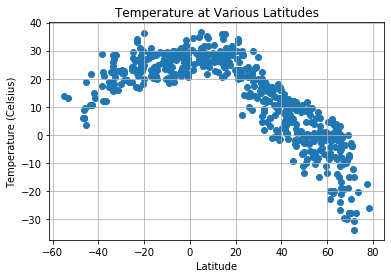

In [33]:
# Latitude vs. Temperature Plot
plt.scatter(lat, max_temp, marker="o")

# Incorporate the other graph properties
plt.title("Temperature at Various Latitudes")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Temperature_Plot.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

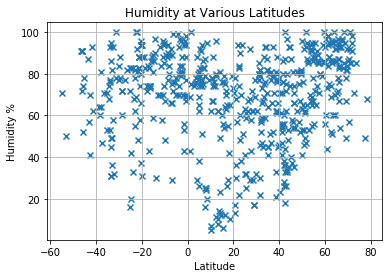

In [34]:
# Latitude vs. Humidity Plot
plt.scatter(lat, humidity, marker="x")

# Incorporate the other graph properties
plt.title("Humidity at Various Latitudes")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Humidity_Plot.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

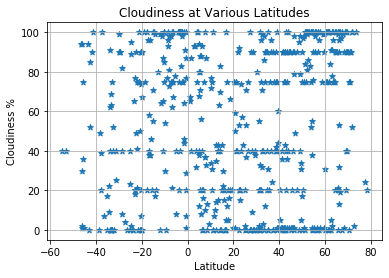

In [36]:
# Latitude vs. Temperature Plot
plt.scatter(lat, cloudiness, marker="*")

# Incorporate the other graph properties
plt.title("Cloudiness at Various Latitudes")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness_Plot.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

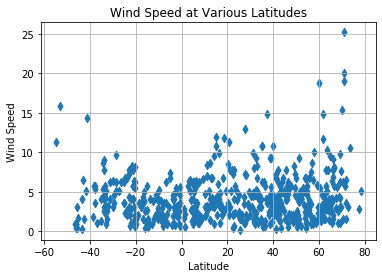

In [38]:
# Latitude vs. Wind Speed Plot
plt.scatter(lat, windspeed, marker="d")

# Incorporate the other graph properties
plt.title("Wind Speed at Various Latitudes")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Temperature_Plot.png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames
northern = []
southern = []


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression